# **Data Exploration**

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/diabetes+dataset.csv")

# Display data summary
print(df.shape)
print(df.info())
print(df.describe())


(25688, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25688 entries, 0 to 25687
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         25688 non-null  object 
 1   Genetic Markers                25688 non-null  object 
 2   Autoantibodies                 25688 non-null  object 
 3   Family History                 25688 non-null  object 
 4   Environmental Factors          25688 non-null  object 
 5   Insulin Levels                 25688 non-null  int64  
 6   Age                            25688 non-null  int64  
 7   BMI                            25688 non-null  int64  
 8   Physical Activity              25687 non-null  object 
 9   Dietary Habits                 25687 non-null  object 
 10  Blood Pressure                 25687 non-null  float64
 11  Cholesterol Levels             25687 non-null  float64
 12  Waist Circumference            256

**Printing the missing values to further evaluate the dataset.**

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

# **Data Visualization**

In [ ]:
print(df.columns)


Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')


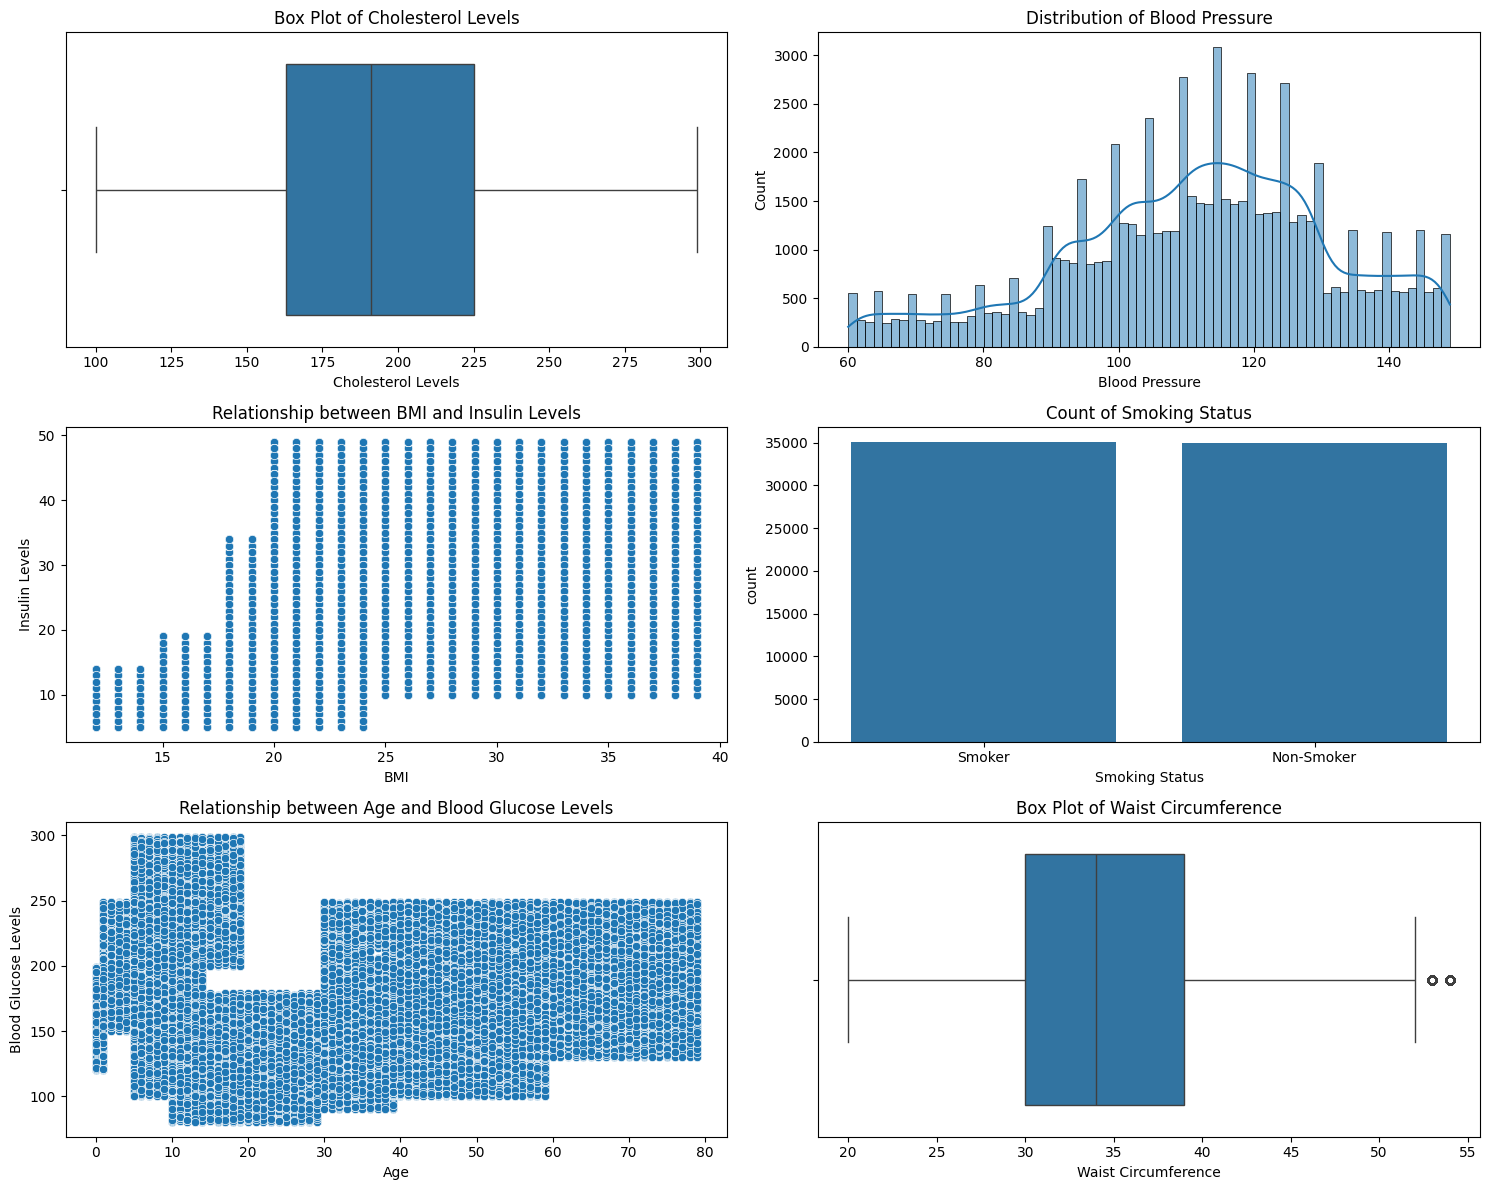

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 12))

# Box Plot for 'Cholesterol Levels'
plt.subplot(3, 2, 1)
sns.boxplot(x=df['Cholesterol Levels'])
plt.title("Box Plot of Cholesterol Levels")

# Histogram for 'Blood Pressure'
plt.subplot(3, 2, 2)
sns.histplot(df['Blood Pressure'], kde=True)
plt.title("Distribution of Blood Pressure")

# Scatter Plot showing relationship between 'BMI' and 'Insulin Levels'
plt.subplot(3, 2, 3)
sns.scatterplot(x=df['BMI'], y=df['Insulin Levels'])
plt.title("Relationship between BMI and Insulin Levels")

# Count Plot for 'Smoking Status'
plt.subplot(3, 2, 4)
sns.countplot(x=df['Smoking Status'])
plt.title("Count of Smoking Status")

# Scatter Plot showing relationship between 'Age' and 'Blood Glucose Levels'
plt.subplot(3, 2, 5)
sns.scatterplot(x=df['Age'], y=df['Blood Glucose Levels'])
plt.title("Relationship between Age and Blood Glucose Levels")

# Box Plot for 'Waist Circumference'
plt.subplot(3, 2, 6)
sns.boxplot(x=df['Waist Circumference'])
plt.title("Box Plot of Waist Circumference")

# Display all plots together
plt.tight_layout()
plt.show()


# **• Data Cleaning:**


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("/content/diabetes+dataset.csv")

# 1. Handle missing values:
# Replace missing values in numerical columns with the mean of the column
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['float64', 'int64']).columns] = imputer.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# 2. Handle outliers:
# Identify outliers using the Interquartile Range (IQR) method for all numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)  # Calculate the first quartile
    Q3 = df[col].quantile(0.75)  # Calculate the third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Filter out outliers

# 3. Handle categorical columns:
# Convert categorical columns to numerical values using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)  # Drop the first column to avoid multicollinearity

# 4. Standardize numerical features:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])  # Standardize the numerical columns

# 5. Drop unnecessary columns (if any):
# List the columns you want to drop (ensure these columns exist in your dataframe)
unnecessary_columns = ['Unnecessary_Column1', 'Unnecessary_Column2']

# Check if columns exist in the dataframe before dropping
existing_columns_to_drop = [col for col in unnecessary_columns if col in df.columns]
if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)

# Display the cleaned data
print(df.head())

# Save the cleaned data to a CSV file (if needed)
df.to_csv("cleaned_data.csv", index=False)


   Insulin Levels       Age       BMI  Blood Pressure  Cholesterol Levels  \
0        1.697624  0.558616  2.192338        0.626936            0.126626   
1       -0.801671 -1.484572 -1.306095       -1.929794           -1.690013   
2        0.494260  0.178488 -0.139951        0.476540           -0.236702   
3       -1.264503 -1.199476 -1.472687       -0.576231           -1.008774   
4       -0.431405 -1.056928 -1.306095       -0.425835           -1.122314   

   Waist Circumference  Blood Glucose Levels  Weight Gain During Pregnancy  \
0             2.255473              0.193211                      0.242105   
1            -1.655404              0.406134                     -0.804026   
2             0.149616             -1.148204                     -0.071735   
3            -0.903312             -0.807527                     -0.385574   
4            -0.301639              2.769578                     -1.431704   

   Pancreatic Health  Pulmonary Function  ...  \
0          -0.60016

# **Feature Engineering:**


**Analyze the relevance of each feature for the machine learning task:**

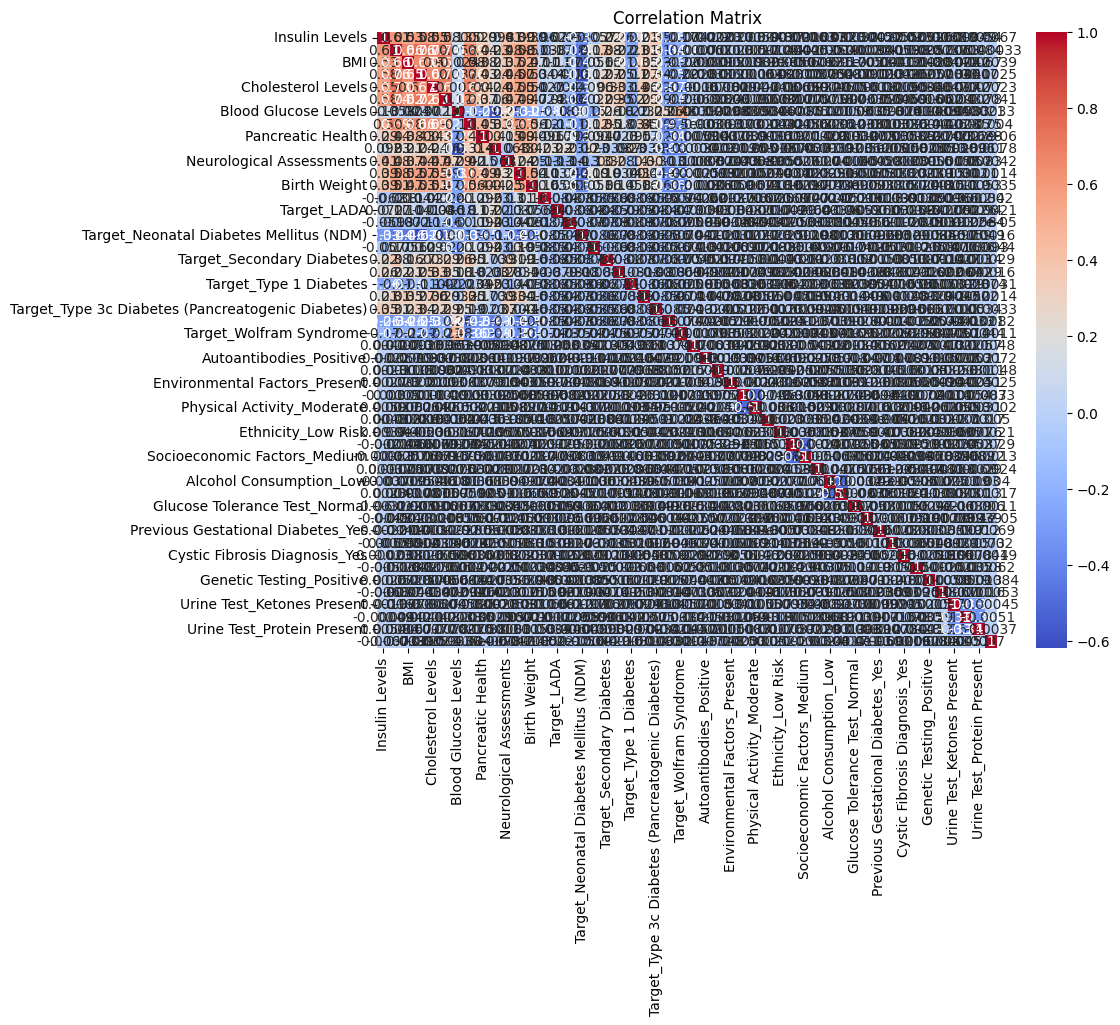

                                                   importance
Age                                                  0.149189
Blood Glucose Levels                                 0.124204
Target_Prediabetic                                   0.075247
Birth Weight                                         0.075229
Pulmonary Function                                   0.056500
Waist Circumference                                  0.055787
Target_LADA                                          0.052914
Weight Gain During Pregnancy                         0.052675
Target_MODY                                          0.051201
Blood Pressure                                       0.048953
BMI                                                  0.047185
Insulin Levels                                       0.044007
Cholesterol Levels                                   0.042793
Target_Type 1 Diabetes                               0.032765
Digestive Enzyme Levels                              0.025985
Neurolog

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')  # Replace this with the actual path to your data

# Correlation Matrix for numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Define the target column (e.g., 'Target_Gestational Diabetes')
target_column = 'Target_Gestational Diabetes'  # Modify based on your target column

# Separate features and target
X = data.drop(target_column, axis=1)  # Drop the target column from features
y = data[target_column]  # Assign the target column to y

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display feature importances
print(feature_importances)


**Encode categorical variables into numerical formats ( one-hot encoding).**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')  # Replace with your file path

# Check for categorical columns (assuming the columns with 'object' type are categorical)
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded data
print(data_encoded.head())


   Insulin Levels       Age       BMI  Blood Pressure  Cholesterol Levels  \
0        1.697624  0.558616  2.192338        0.626936            0.126626   
1       -0.801671 -1.484572 -1.306095       -1.929794           -1.690013   
2        0.494260  0.178488 -0.139951        0.476540           -0.236702   
3       -1.264503 -1.199476 -1.472687       -0.576231           -1.008774   
4       -0.431405 -1.056928 -1.306095       -0.425835           -1.122314   

   Waist Circumference  Blood Glucose Levels  Weight Gain During Pregnancy  \
0             2.255473              0.193211                      0.242105   
1            -1.655404              0.406134                     -0.804026   
2             0.149616             -1.148204                     -0.071735   
3            -0.903312             -0.807527                     -0.385574   
4            -0.301639              2.769578                     -1.431704   

   Pancreatic Health  Pulmonary Function  ...  \
0          -0.60016

**Scale or normalize numerical features for consistency**

# 1. Min-Max Scaling (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the scaled data
print(data.head())


   Insulin Levels       Age       BMI  Blood Pressure  Cholesterol Levels  \
0        0.795455  0.556962  0.962963        0.719101            0.507538   
1        0.181818  0.012658  0.185185        0.146067            0.105528   
2        0.500000  0.455696  0.444444        0.685393            0.427136   
3        0.068182  0.088608  0.148148        0.449438            0.256281   
4        0.272727  0.126582  0.185185        0.483146            0.231156   

   Waist Circumference  Blood Glucose Levels  Weight Gain During Pregnancy  \
0              0.93750              0.401826                      0.461538   
1              0.12500              0.447489                      0.205128   
2              0.50000              0.114155                      0.384615   
3              0.28125              0.187215                      0.307692   
4              0.40625              0.954338                      0.051282   

   Pancreatic Health  Pulmonary Function  ...  \
0           0.29213

# 2. Standardization (Z-score Normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the standardized data
print(data.head())


   Insulin Levels       Age       BMI  Blood Pressure  Cholesterol Levels  \
0        1.697624  0.558616  2.192338        0.626936            0.126626   
1       -0.801671 -1.484572 -1.306095       -1.929794           -1.690013   
2        0.494260  0.178488 -0.139951        0.476540           -0.236702   
3       -1.264503 -1.199476 -1.472687       -0.576231           -1.008774   
4       -0.431405 -1.056928 -1.306095       -0.425835           -1.122314   

   Waist Circumference  Blood Glucose Levels  Weight Gain During Pregnancy  \
0             2.255473              0.193211                      0.242105   
1            -1.655404              0.406134                     -0.804026   
2             0.149616             -1.148204                     -0.071735   
3            -0.903312             -0.807527                     -0.385574   
4            -0.301639              2.769578                     -1.431704   

   Pancreatic Health  Pulmonary Function  ...  \
0          -0.60016

**Use dimensionality reduction techniques to reduce data dimensionality while retaining important information.**

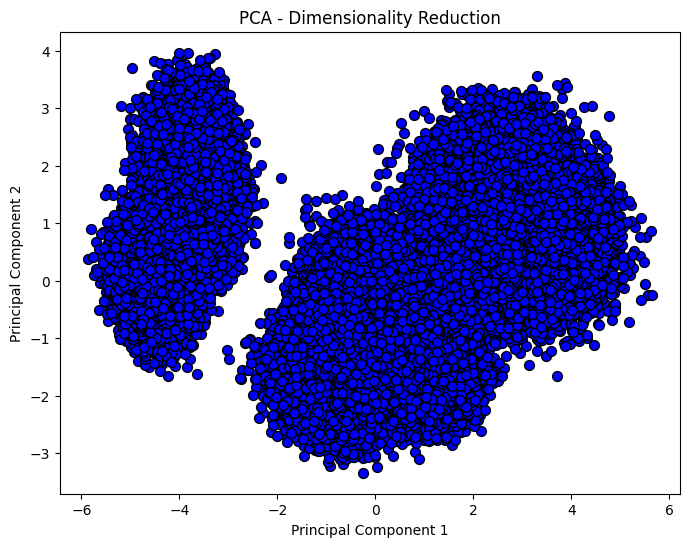

Explained variance ratio: [0.32933116 0.10689077]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume the data is stored in `data` after scaling or normalization

# Set the number of dimensions to reduce the data to
n_components = 2  # In this case, reducing the data to 2 dimensions

# Apply PCA on the data
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

# Plot the reduced data in a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the explained variance ratio for each principal component
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


**Model Evaluation:**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')

# Define the target variable (the column containing the target values)
# Make sure to change the column name to match the actual target column in your data
y = data['Target_Gestational Diabetes']  # The target column
X = data.drop(columns=['Target_Gestational Diabetes'])  # Drop the target column from the features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling to the data (important for techniques like SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply feature selection using RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train_scaled, y_train)

# Select the chosen features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train Random Forest model on raw (unprocessed) data
model_raw = RandomForestClassifier(n_estimators=100, random_state=42)
model_raw.fit(X_train, y_train)

# Predict using raw data
y_pred_raw = model_raw.predict(X_test)

# Calculate accuracy for the raw data model
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Train Random Forest model on processed data (after feature selection)
model_processed = RandomForestClassifier(n_estimators=100, random_state=42)
model_processed.fit(X_train_selected, y_train)

# Predict using processed data
y_pred_processed = model_processed.predict(X_test_selected)

# Calculate accuracy for the processed data model
accuracy_processed = accuracy_score(y_test, y_pred_processed)

# Print the results
print(f"Accuracy on raw data: {accuracy_raw:.4f}")
print(f"Accuracy on processed data: {accuracy_processed:.4f}")




Accuracy on raw data: 0.9957
Accuracy on processed data: 0.9955


**Experiments:**


In [ ]:
# Import necessary libraries for evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the dataset
data = pd.read_csv('/content/cleaned_data.csv')

# Define the target variable (the column containing the target values)
y = data['Target_Gestational Diabetes']  # The target column
X = data.drop(columns=['Target_Gestational Diabetes'])  # Drop the target column from the features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling to the data (important for techniques like SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply feature selection using RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train_scaled, y_train)

# Select the chosen features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train Random Forest model on raw (unprocessed) data
model_raw = RandomForestClassifier(n_estimators=100, random_state=42)
model_raw.fit(X_train, y_train)

# Predict using raw data
y_pred_raw = model_raw.predict(X_test)

# Train Random Forest model on processed data (after feature selection)
model_processed = RandomForestClassifier(n_estimators=100, random_state=42)
model_processed.fit(X_train_selected, y_train)

# Predict using processed data
y_pred_processed = model_processed.predict(X_test_selected)

# Calculate accuracy, precision, recall, and F1 score for both models
accuracy_raw = accuracy_score(y_test, y_pred_raw)
accuracy_processed = accuracy_score(y_test, y_pred_processed)

precision_raw = precision_score(y_test, y_pred_raw)
precision_processed = precision_score(y_test, y_pred_processed)

recall_raw = recall_score(y_test, y_pred_raw)
recall_processed = recall_score(y_test, y_pred_processed)

f1_raw = f1_score(y_test, y_pred_raw)
f1_processed = f1_score(y_test, y_pred_processed)

# Print the results for comparison
print(f"Model trained on raw data:")
print(f"Accuracy: {accuracy_raw:.4f}, Precision: {precision_raw:.4f}, Recall: {recall_raw:.4f}, F1: {f1_raw:.4f}")

print(f"\nModel trained on processed data:")
print(f"Accuracy: {accuracy_processed:.4f}, Precision: {precision_processed:.4f}, Recall: {recall_processed:.4f}, F1: {f1_processed:.4f}")


Model trained on raw data:
Accuracy: 0.9957, Precision: 0.9492, Recall: 1.0000, F1: 0.9740

Model trained on processed data:
Accuracy: 0.9955, Precision: 0.9476, Recall: 1.0000, F1: 0.9731


# **Part 2: Comparative Analysis of Classification Techniques**


In [ ]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Data preparation (as done in Part 1)
data = pd.read_csv('/content/cleaned_data.csv')  # Load the dataset
y = data['Target_Gestational Diabetes']  # Target column (Gestational Diabetes)
X = data.drop(columns=['Target_Gestational Diabetes'])  # Drop the target column to get features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Random Forest (RF) model
rf_model = RandomForestClassifier(random_state=42)  # Initialize RandomForestClassifier
rf_model.fit(X_train_scaled, y_train)  # Train the model
y_pred_rf = rf_model.predict(X_test_scaled)  # Predict on the test set

# Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)  # Initialize SVC (Support Vector Classifier)
svm_model.fit(X_train_scaled, y_train)  # Train the model
y_pred_svm = svm_model.predict(X_test_scaled)  # Predict on the test set

# Multilayer Perceptron (MLP) model
mlp_model = MLPClassifier(random_state=42)  # Initialize MLPClassifier
mlp_model.fit(X_train_scaled, y_train)  # Train the model
y_pred_mlp = mlp_model.predict(X_test_scaled)  # Predict on the test set

# Function to evaluate the models' performance
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred)  # Calculate precision
    recall = recall_score(y_test, y_pred)  # Calculate recall
    f1 = f1_score(y_test, y_pred)  # Calculate F1 score
    return accuracy, precision, recall, f1

# Print the evaluation results for each model
print("Random Forest (RF):")
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1: {f1_rf:.4f}")

print("\nSupport Vector Machine (SVM):")
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1: {f1_svm:.4f}")

print("\nMultilayer Perceptron (MLP):")
accuracy_mlp, precision_mlp, recall_mlp, f1_mlp = evaluate_model(y_test, y_pred_mlp)
print(f"Accuracy: {accuracy_mlp:.4f}, Precision: {precision_mlp:.4f}, Recall: {recall_mlp:.4f}, F1: {f1_mlp:.4f}")

# Parameter tuning for each model using GridSearchCV (optional)
# Parameter tuning for RandomForest
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)  # Initialize GridSearchCV for RandomForest
rf_grid_search.fit(X_train_scaled, y_train)  # Fit the grid search on the training data
print("\nBest parameters for Random Forest:", rf_grid_search.best_params_)  # Print the best parameters found

# Parameter tuning for SVM
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)  # Initialize GridSearchCV for SVM
svm_grid_search.fit(X_train_scaled, y_train)  # Fit the grid search on the training data
print("\nBest parameters for SVM:", svm_grid_search.best_params_)  # Print the best parameters found

# Parameter tuning for MLP
mlp_param_grid = {'hidden_layer_sizes': [(100,), (50, 50)], 'activation': ['tanh', 'relu'], 'solver': ['adam']}
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5)  # Initialize GridSearchCV for MLP
mlp_grid_search.fit(X_train_scaled, y_train)  # Fit the grid search on the training data
print("\nBest parameters for MLP:", mlp_grid_search.best_params_)  # Print the best parameters found


Random Forest (RF):
Accuracy: 0.9957, Precision: 0.9492, Recall: 1.0000, F1: 0.9740

Support Vector Machine (SVM):
Accuracy: 0.9832, Precision: 0.8792, Recall: 0.9175, F1: 0.8980

Multilayer Perceptron (MLP):
Accuracy: 0.9836, Precision: 0.8970, Recall: 0.9003, F1: 0.8986

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best parameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


**Effect of Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is your cleaned dataset
X = data.drop(columns=['Target_Gestational Diabetes'])  # Features
y = data['Target_Gestational Diabetes']  # Target

# Data Cleaning: Handling missing values
imputer = SimpleImputer(strategy='mean')
X_clean = imputer.fit_transform(X)  # Replace missing values with mean

# Feature Engineering: Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after Preprocessing (Data Cleaning + Feature Engineering): {accuracy:.4f}")


Accuracy after Preprocessing (Data Cleaning + Feature Engineering): 0.9957


**Effect of Model Parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Grid Search for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print(f"Best Parameters for RandomForest: {grid_search_rf.best_params_}")

# Evaluate the tuned model
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy with Tuned Parameters: {accuracy_rf:.4f}")


Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy with Tuned Parameters: 0.9956


**repeat the same approach for SVM and MLP models:**

In [ ]:
# Example: Grid Search for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")

# Example: Grid Search for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
}
grid_search_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train)
print(f"Best Parameters for MLP: {grid_search_mlp.best_params_}")


Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Parameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


**Experiments:**


**1_Model Training and Evaluation:Random Forest, SVM, and MLP.**

**2_Hyperparameter Tuning using GridSearchCV:**

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters for SVM: {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best parameters for MLP: {'solver': 'adam', 'max_iter': 200, 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}

Random Forest (RF):
Accuracy: 0.9957, Precision: 0.9959, Recall: 0.9957, F1: 0.9957

Support Vector Machine (SVM):
Accuracy: 0.9832, Precision: 0.9836, Recall: 0.9832, F1: 0.9833

Multilayer Perceptron (MLP):
Accuracy: 0.9832, Precision: 0.9831, Recall: 0.9832, F1: 0.9831

Performance Summary:
           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.995679   0.995899  0.995679  0.995730
1            

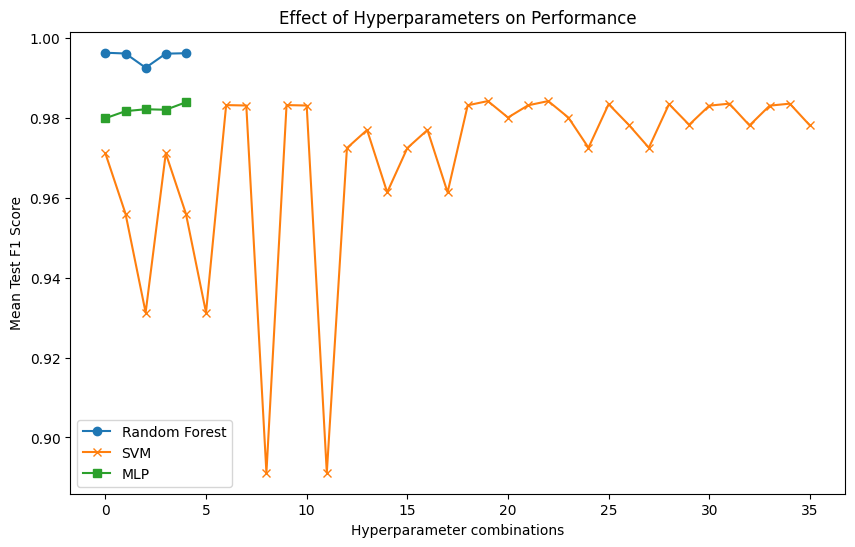

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/cleaned_data.csv')  # Replace with your file path
y = data['Target_Gestational Diabetes']  # Target column
X = data.drop(columns=['Target_Gestational Diabetes'])  # Features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grids
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'max_iter': [200]
}

# Models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42, probability=True)
mlp_model = MLPClassifier(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_param_grid, n_iter=5, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted')
rf_random_search.fit(X_train_scaled, y_train)
print("\nBest parameters for Random Forest:", rf_random_search.best_params_)

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted')
svm_grid_search.fit(X_train_scaled, y_train)
print("\nBest parameters for SVM:", svm_grid_search.best_params_)

mlp_random_search = RandomizedSearchCV(mlp_model, mlp_param_grid, n_iter=5, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted')
mlp_random_search.fit(X_train_scaled, y_train)
print("\nBest parameters for MLP:", mlp_random_search.best_params_)

# Best models
best_rf_model = rf_random_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_
best_mlp_model = mlp_random_search.best_estimator_

# Predictions using the models
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_pred_svm = best_svm_model.predict(X_test_scaled)
y_pred_mlp = best_mlp_model.predict(X_test_scaled)

# Model evaluation function
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluation results
print("\nRandom Forest (RF):")
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1: {f1_rf:.4f}")

print("\nSupport Vector Machine (SVM):")
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1: {f1_svm:.4f}")

print("\nMultilayer Perceptron (MLP):")
accuracy_mlp, precision_mlp, recall_mlp, f1_mlp = evaluate_model(y_test, y_pred_mlp)
print(f"Accuracy: {accuracy_mlp:.4f}, Precision: {precision_mlp:.4f}, Recall: {recall_mlp:.4f}, F1: {f1_mlp:.4f}")

# Summarized results
results_summary = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "MLP"],
    "Accuracy": [accuracy_rf, accuracy_svm, accuracy_mlp],
    "Precision": [precision_rf, precision_svm, precision_mlp],
    "Recall": [recall_rf, recall_svm, recall_mlp],
    "F1-Score": [f1_rf, f1_svm, f1_mlp],
})
print("\nPerformance Summary:")
print(results_summary)

# Analyze effect of hyperparameters
rf_results = pd.DataFrame(rf_random_search.cv_results_)
svm_results = pd.DataFrame(svm_grid_search.cv_results_)
mlp_results = pd.DataFrame(mlp_random_search.cv_results_)

print("\nRandom Forest Best Parameters and Performance:")
print(rf_results[['param_n_estimators', 'param_max_depth', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head())

print("\nSVM Best Parameters and Performance:")
print(svm_results[['param_C', 'param_kernel', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head())

print("\nMLP Best Parameters and Performance:")
print(mlp_results[['param_hidden_layer_sizes', 'param_alpha', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head())

# Visualization of results
plt.figure(figsize=(10, 6))
plt.plot(rf_results['mean_test_score'], label='Random Forest', marker='o')
plt.plot(svm_results['mean_test_score'], label='SVM', marker='x')
plt.plot(mlp_results['mean_test_score'], label='MLP', marker='s')
plt.xlabel("Hyperparameter combinations")
plt.ylabel("Mean Test F1 Score")
plt.title("Effect of Hyperparameters on Performance")
plt.legend()
plt.show()
